In [1]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize']= (16, 12)

In [2]:
# load dataset
cleaned_df= pd.read_csv('neiva_solocast_data_cleaned.csv')
cleaned_df.head()

,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
0,2019-12-31,12,2019-12-31,23.766667,46.750000,79.083333,918.991667,79.000000,1.408333,331.583333,210.500000,455.166667
1,2020-01-01,1,2020-01-01,24.941667,45.525000,73.583333,918.416667,74.666667,1.516667,410.833333,185.250000,484.666667
2,2020-01-02,1,2020-01-02,24.525000,41.516667,76.166667,918.983333,179.000000,1.008333,390.083333,219.750000,456.333333
3,2020-01-03,1,2020-01-03,25.183333,31.233333,69.666667,921.125000,191.333333,0.566667,546.666667,148.083333,513.000000
4,2020-01-04,1,2020-01-04,24.650000,28.000000,68.416667,921.825000,164.250000,0.791667,617.250000,117.916667,534.666667


In [3]:
cleaned_df.describe()

,MonthPE,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_DHI,Daily_radiation
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,6.412831,25.373012,40.858300,63.841240,919.478268,168.706706,1.360409,304.474240,202.934766,418.371340
std,3.398529,1.892147,3.514268,11.467280,3.780218,49.616002,0.794126,160.631430,51.654938,83.437612
min,1.000000,19.100000,25.015385,35.846154,852.650000,17.416667,0.250000,0.000000,67.769231,104.461538
25%,3.000000,24.300000,39.138462,54.461538,918.733333,143.000000,0.784615,176.230769,167.307692,366.615385
50%,6.000000,25.400000,41.330769,65.083333,919.576923,185.538462,1.141667,296.615385,206.083333,430.384615
75%,9.000000,26.661538,43.316667,72.307692,920.476923,202.333333,1.733333,412.666667,238.538462,477.692308
max,12.000000,29.584615,49.216667,93.083333,924.484615,285.538462,5.169231,719.750000,333.583333,601.750000


In [4]:
cleaned_df.isnull().sum()


Unnamed: 0         0
MonthPE            0
Date               0
Daily_Temp         0
Daily_Precip       0
Daily_Humidity     0
Daily_Pressure     0
Daily_WindDir      0
Daily_WindSpeed    0
Daily_DNI          0
Daily_DHI          0
Daily_radiation    0
dtype: int64

In [5]:
cleaned_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       717 non-null    object 
 1   MonthPE          717 non-null    int64  
 2   Date             717 non-null    object 
 3   Daily_Temp       717 non-null    float64
 4   Daily_Precip     717 non-null    float64
 5   Daily_Humidity   717 non-null    float64
 6   Daily_Pressure   717 non-null    float64
 7   Daily_WindDir    717 non-null    float64
 8   Daily_WindSpeed  717 non-null    float64
 9   Daily_DNI        717 non-null    float64
 10  Daily_DHI        717 non-null    float64
 11  Daily_radiation  717 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 67.3+ KB


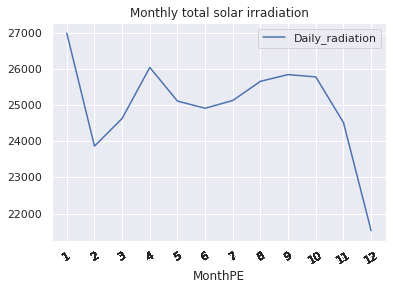

In [6]:
# A plot pf total irriadtion for each 
rad_vs_month= cleaned_df.loc[:, ['Daily_radiation', 'MonthPE']].groupby('MonthPE').sum()
rad_vs_month.plot()
plt.xticks(cleaned_df['MonthPE'], rotation=30)
plt.title('Monthly total solar irradiation')
plt.show()

Locator attempting to generate 3938 ticks ([-35.800000000000004, ..., 751.6000000000113]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3938 ticks ([-35.800000000000004, ..., 751.6000000000113]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3938 ticks ([-35.800000000000004, ..., 751.6000000000113]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3938 ticks ([-35.800000000000004, ..., 751.6000000000113]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3938 ticks ([-35.800000000000004, ..., 751.6000000000113]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3938 ticks ([-35.800000000000004, ..., 751.6000000000113]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3938 ticks ([-35.800000000000004, ..., 751.6000000000113]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 3938 ticks ([-35.800000000000004, ..., 751.6000000000113]),

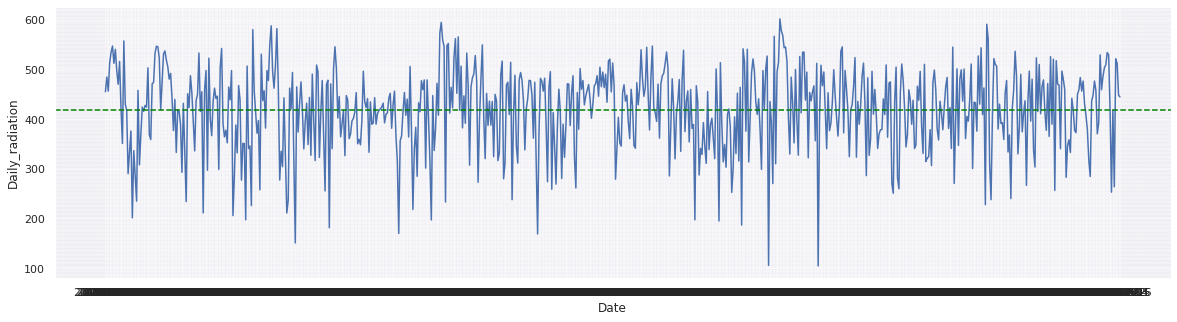

In [7]:
# Daily solar irradiation plot
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data= cleaned_df, x="Date", y="Daily_radiation")

rad_avg= cleaned_df['Daily_radiation'].mean()
ax.axhline(rad_avg, color='green', linestyle='--', label=f"Mean - {rad_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='white',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='white', alpha=0.7)

plt.show()
ax.legend()

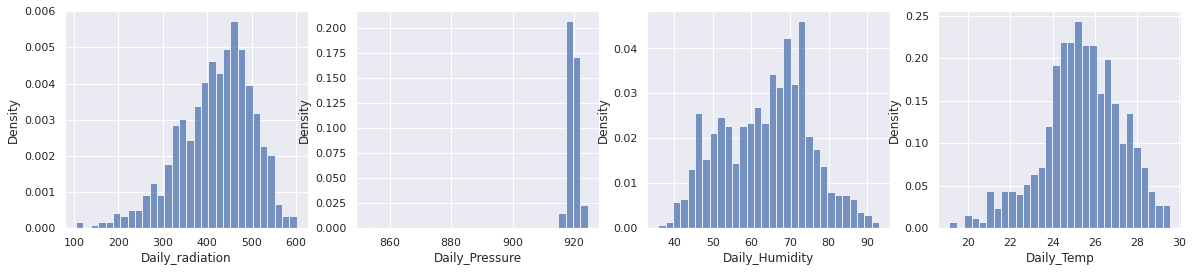

In [8]:
# Histogram distribution of weather features and solar irradiation
f, ax = plt.subplots(1, 4, figsize=(20,4))
sns.histplot(cleaned_df['Daily_radiation'], stat="density", bins=30, ax=ax[0])
sns.histplot(cleaned_df['Daily_Pressure'], stat="density", bins=30, ax=ax[1])
sns.histplot(cleaned_df['Daily_Humidity'], stat="density", bins=30, ax=ax[2])
sns.histplot(cleaned_df['Daily_Temp'], stat="density", bins=30, ax=ax[3])
plt.show()

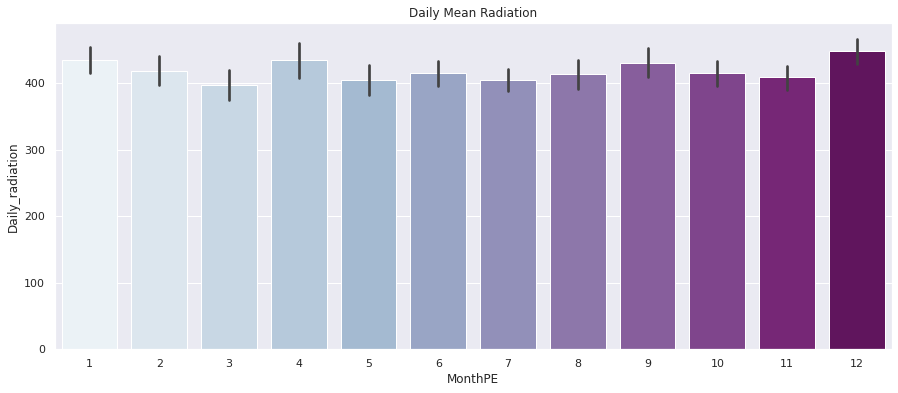

In [9]:
# Histogram plot of daily mean radiation
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x="MonthPE", y='Daily_radiation', data= cleaned_df, palette= "BuPu")
ax.set_title('Daily Mean Radiation')
plt.show()

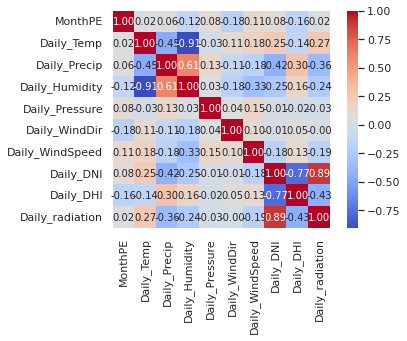

In [10]:
# feature correlation
corr= cleaned_df.corr(method = "pearson")

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="coolwarm", square=True, annot=True, fmt=".2f")
plt.show()

In [11]:
# Adfuller testt on target feature
from statsmodels.tsa.stattools import adfuller
Xrad = cleaned_df['Daily_radiation'].values
result = adfuller(Xrad)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) # p-value <= 0.05

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -8.638207
p-value: 0.000000
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569
